# 토마토 

## 문제

* 철수의 토마토 농장에서는 토마토를 보관하는 큰 창고를 가지고 있다. 토마토는 아래의 그림과 같이 격자 모양 상자의 칸에 하나씩 넣어서 창고에 보관한다.

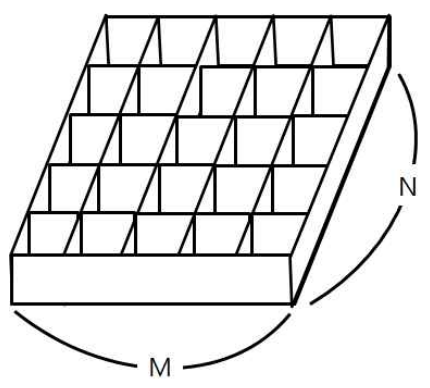

In [1]:
from IPython.display import Image
Image('../image/7576_토마토.png', width=300)

* 창고에 보관되는 토마토들 중에는 잘 익은 것도 있지만, 아직 익지 않은 토마토들도 있을 수 있다. 보관 후 하루가 지나면, 익은 토마토들의 인접한 곳에 있는 익지 않은 토마토들은 익은 토마토의 영향을 받아 익게 된다. 하나의 토마토의 인접한 곳은 왼쪽, 오른쪽, 앞, 뒤 네 방향에 있는 토마토를 의미한다. 대각선 방향에 있는 토마토들에게는 영향을 주지 못하며, 토마토가 혼자 저절로 익는 경우는 없다고 가정한다. 철수는 창고에 보관된 토마토들이 며칠이 지나면 다 익게 되는지, 그 최소 일수를 알고 싶어 한다.

* 토마토를 창고에 보관하는 격자모양의 상자들의 크기와 익은 토마토들과 익지 않은 토마토들의 정보가 주어졌을 때, 며칠이 지나면 토마토들이 모두 익는지, 그 최소 일수를 구하는 프로그램을 작성하라. 단, 상자의 일부 칸에는 토마토가 들어있지 않을 수도 있다.

## 입력

* 첫 줄에는 상자의 크기를 나타내는 두 정수 M,N이 주어진다. M은 상자의 가로 칸의 수, N은 상자의 세로 칸의 수를 나타낸다. 단, 2 ≤ M,N ≤ 1,000 이다. 둘째 줄부터는 하나의 상자에 저장된 토마토들의 정보가 주어진다. 즉, 둘째 줄부터 N개의 줄에는 상자에 담긴 토마토의 정보가 주어진다. 하나의 줄에는 상자 가로줄에 들어있는 토마토의 상태가 M개의 정수로 주어진다. 정수 1은 익은 토마토, 정수 0은 익지 않은 토마토, 정수 -1은 토마토가 들어있지 않은 칸을 나타낸다.

* 토마토가 하나 이상 있는 경우만 입력으로 주어진다.

## 출력

* 여러분은 토마토가 모두 익을 때까지의 최소 날짜를 출력해야 한다. 만약, 저장될 때부터 모든 토마토가 익어있는 상태이면 0을 출력해야 하고, 토마토가 모두 익지는 못하는 상황이면 -1을 출력해야 한다.

## Code

In [2]:
#7576_토마토
import sys
from collections import deque

submit = False
input = sys.stdin.readline if submit else input


def bfs(graph, positions):
    dx, dy = [-1, 1, 0, 0], [0, 0, -1, 1]
    width, height = len(graph[0]), len(graph)
    while positions:
        y, x = positions.popleft()
        for i in range(4):
            nx, ny = x + dx[i], y + dy[i]
            if (0 <= nx < width) & (0 <= ny < height):
                if (graph[ny][nx] == 0):
                    graph[ny][nx] = graph[y][x] + 1
                    positions.append((ny, nx))

def complete_check(graph):
    complete, max_num = True, float('-inf')
    for i in range(len(graph)):
        for j in range(len(graph[0])):
            num = graph[i][j]
            if num == 0:
                complete = False
            if num > max_num:
                max_num = num
    return max_num - 1 if complete else -1

def solution():
    N, M = map(int, input().split())
    graph = [list(map(int, input().split())) for _ in range(M)]

    queue = deque()
    for i in range(M):
        for j in range(N):
            if graph[i][j] == 1:
                queue.append((i, j))

    bfs(graph, queue)
    print(complete_check(graph))


In [3]:
solution()

8


In [4]:
solution()

-1


In [5]:
solution()

6


In [6]:
solution()

14


In [7]:
solution()

0


## Note

* 1. 토마토의 위치를 2차원 List(graph)에 저장하고 익은 토마토(1)의 좌표를 deque(queue)에 저장한다
* 2. bfs를 사용해서 값이 1인 익은 토마토의 상하좌우 좌표에 1을 더해주고 해당 좌표를 deque에 저장한 뒤 상하좌우에 1을 더해주는 과정을 반복한다.
    * 익은 토마토가 여러군데에 있는 경우에 인근 좌표의 값을 1로 바꾸는 과정이 일정한 속도로 진행되어야 하기 때문에 dfs는 사용할 수 없다.
* 3. bfs가 끝나고 graph에 0이 남아있는지를 파악하고 0이 남아 있으면 -1을 없으면 최대값의 -1를 반환한다.
    * 1부터 시작했으므로 1을 빼주는 과정이 필요하다

https://www.acmicpc.net/problem/7576